In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [78]:
# Define a sinusoidal signal
def mysignal(t, f1,f2, amplitude1,amplitude2):
  return (amplitude1 * np.cos(2 * np.pi * f1 * t)+amplitude2*np.cos(2 * np.pi * f2 * t))

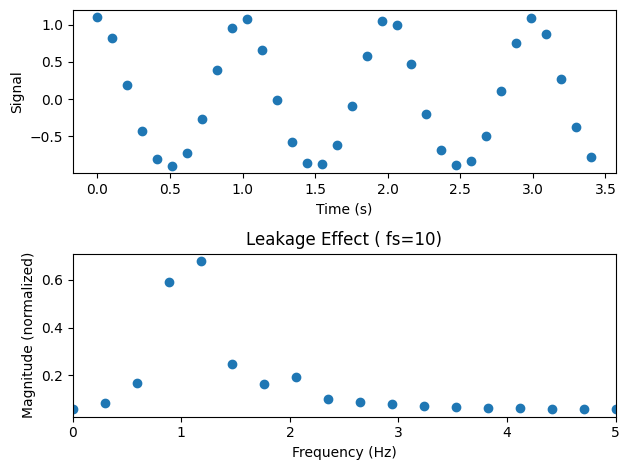

In [79]:
#effect of windowing

# Sample rate and time duration
fs = 10  # Hz
T = 3.4  # seconds
t = np.linspace(0, T, int(T * fs))

# Signal frequency (not an integer multiple of sampling rate)
f01 = 1  # Hz (not an integer multiple of fs)
f02 = 2
y = mysignal(t, f01,f02, 1,0.1)

# Windowing function (optional, reduces leakage but affects resolution)
# uncomment the following lines to apply a Hanning window
# win = np.hanning(len(y))
# y *= win

# Calculate FFT
fft_data = np.fft.fft(y)
fft_abs = np.abs(fft_data) / len(y)  # normalize magnitude

# Calculate frequency axis
f = np.linspace(0, fs/2, int(len(fft_data)/2) + 1)

# Plot original signal and FFT
plt.subplot(2, 1, 1)
plt.scatter(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Signal')

plt.subplot(2, 1, 2)
plt.scatter(f, 2*fft_abs[:len(f)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (normalized)')

# Show leakage around the expected frequency (f0) due to non-integer multiple of sampling rate
plt.title('Leakage Effect ( fs={})'.format( fs))
plt.xlim(0, 5)  # Limit frequency plot to half the sampling rate
plt.tight_layout()
plt.show()


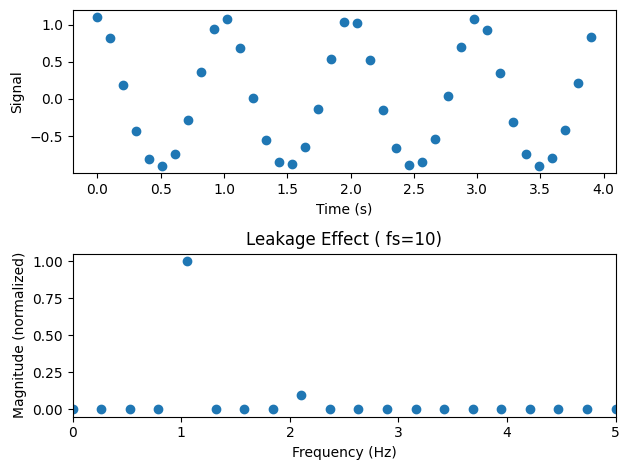

In [80]:
# Sample rate and time duration
fs = 10  # Hz
T = 3.9  # seconds
t = np.linspace(0, T, int(T * fs))

# Signal frequency (an integer multiple of sampling rate)
f01 = 1  # Hz (an integer multiple of fs)
f02 = 2
y = mysignal(t, f01,f02, 1,0.1)

# Windowing function (optional, reduces leakage but affects resolution)
# uncomment the following lines to apply a Hanning window
# win = np.hanning(len(y))
# y *= win

# Calculate FFT
fft_data = np.fft.fft(y)
fft_abs = np.abs(fft_data) / len(y)  # normalize magnitude

# Calculate frequency axis
f = np.linspace(0, fs/2, int(len(fft_data)/2) + 1)

# Plot original signal and FFT
plt.subplot(2, 1, 1)
plt.scatter(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Signal')

plt.subplot(2, 1, 2)
plt.scatter(f, 2*fft_abs[:len(f)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (normalized)')

# Show leakage around the expected frequency (f0) due to non-integer multiple of sampling rate
plt.title('Leakage Effect ( fs={})'.format( fs))
plt.xlim(0, 5)  # Limit frequency plot to half the sampling rate
plt.tight_layout()
plt.show()


Window spectrum

(-0.025, 1.025)

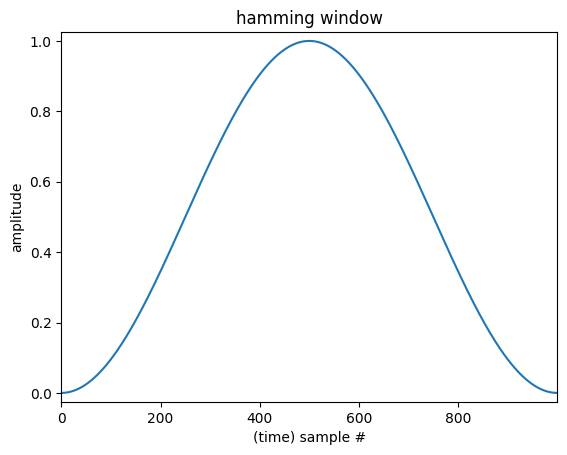

In [81]:
m = 1000
t = np.arange(m)

window = signal.windows.hann(m)

plt.plot(t, window)
plt.xlabel("(time) sample #")
plt.ylabel("amplitude")
plt.title("hamming window")
plt.xlim(0, m-1)
plt.ylim(-0.025, 1.025)

C:\Users\shahin1009\AppData\Local\Temp\ipykernel_6392\2577340350.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 20*np.log10(np.abs(w_fft) / np.abs(w_fft).max()))


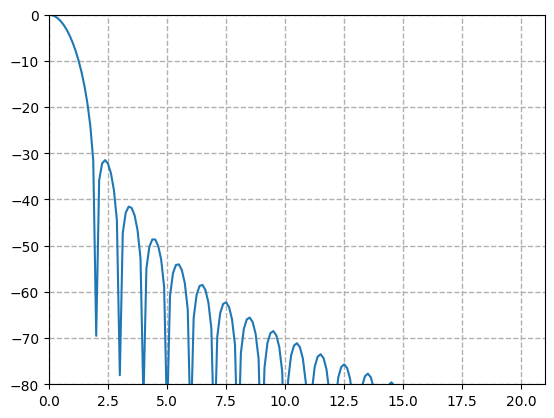

In [82]:
n = 8000
w_fft = np.fft.rfft(window, n)
freqs = np.fft.rfftfreq(n, d=1/m)
plt.plot(freqs, 20*np.log10(np.abs(w_fft) / np.abs(w_fft).max()))
plt.xlim(0, 21,)
plt.ylim(-80,0)
plt.grid(True, linestyle='--', linewidth=1, which='both')

Effect of adding a window

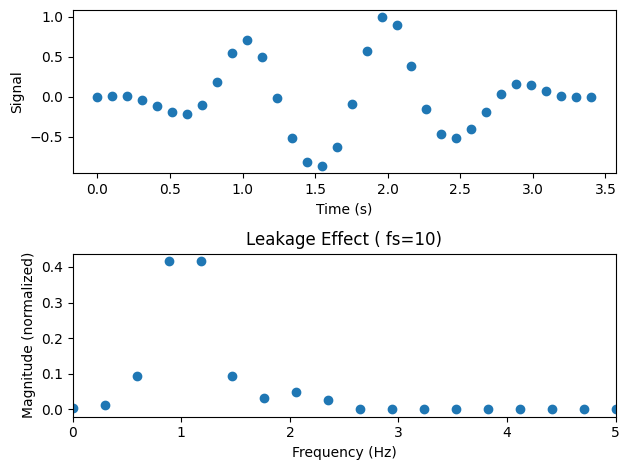

In [83]:
# Sample rate and time duration
fs = 10  # Hz
T = 3.4  # seconds
t = np.linspace(0, T, int(T * fs))

# Signal frequency (not an integer multiple of sampling rate)
f01 = 1  # Hz (not an integer multiple of fs)
f02 = 2
y = mysignal(t, f01,f02, 1,0.1)

# Windowing function (optional, reduces leakage but affects resolution)
# uncomment the following lines to apply a Hanning window
# win = np.hanning(len(y))
window = signal.windows.hann(len(y))
y *= window

# Calculate FFT
fft_data = np.fft.fft(y)
fft_abs = np.abs(fft_data) / len(y)  # normalize magnitude

# Calculate frequency axis
f = np.linspace(0, fs/2, int(len(fft_data)/2) + 1)

# Plot original signal and FFT
plt.subplot(2, 1, 1)
plt.scatter(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Signal')

plt.subplot(2, 1, 2)
plt.scatter(f, 2*fft_abs[:len(f)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (normalized)')

# Show leakage around the expected frequency (f0) due to non-integer multiple of sampling rate
plt.title('Leakage Effect ( fs={})'.format( fs))
plt.xlim(0, 5)  # Limit frequency plot to half the sampling rate
plt.tight_layout()
plt.show()

# Other types of windows


C:\Users\shahin1009\AppData\Local\Temp\ipykernel_6392\2221202466.py:29: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 20*np.log10(np.abs(w_fft1) / np.abs(w_fft1).max()))
C:\Users\shahin1009\AppData\Local\Temp\ipykernel_6392\2221202466.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 20*np.log10(np.abs(w_fft2) / np.abs(w_fft2).max()))
C:\Users\shahin1009\AppData\Local\Temp\ipykernel_6392\2221202466.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.plot(freqs, 20*np.log10(np.abs(w_fft3) / np.abs(w_fft3).max()))


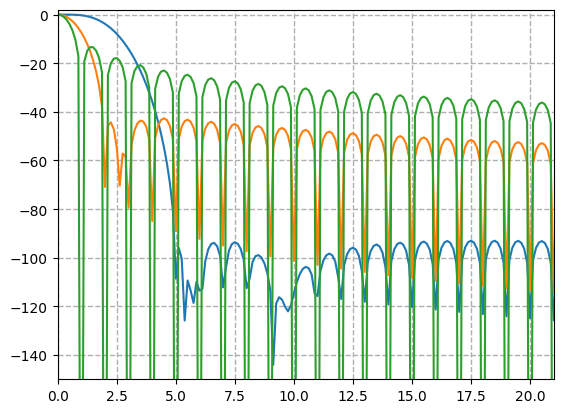

In [84]:
# flattop
m = 1000
t = np.arange(m)

def rectangular_window(window_size):
    """
    Creates a rectangular window function of specified size.

    Args:
        window_size (int): Size of the window (number of elements).

    Returns:
        numpy.ndarray: Array containing the rectangular window function values.
    """
    window = np.ones(window_size)
    return window


recwindow = rectangular_window(m)
window1 = signal.windows.flattop(m)
window2 = signal.windows.hamming(m)

n = 8000
w_fft1 = np.fft.rfft(window1, n)
w_fft2 = np.fft.rfft(window2, n)
w_fft3 = np.fft.rfft(recwindow, n)

freqs = np.fft.rfftfreq(n, d=1/m)
plt.plot(freqs, 20*np.log10(np.abs(w_fft1) / np.abs(w_fft1).max()))
plt.plot(freqs, 20*np.log10(np.abs(w_fft2) / np.abs(w_fft2).max()))
plt.plot(freqs, 20*np.log10(np.abs(w_fft3) / np.abs(w_fft3).max()))

plt.xlim(0, 21,)
plt.ylim(-150,2)
plt.grid(True, linestyle='--', linewidth=1, which='both')

When hann window works better than rectangular window?

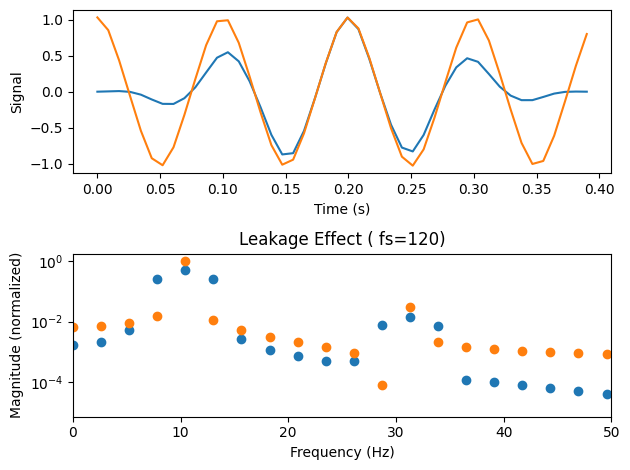

In [118]:
# Sample rate and time duration
fs = 120  # Hz
T = 0.39  # seconds
t = np.linspace(0, T, int(T * fs))

# Signal frequency (not an integer multiple of sampling rate)
f01 = 10  # Hz (not an integer multiple of fs)
f02 = 30
y = mysignal(t, f01,f02, 1,0.03)


recwindow = rectangular_window(len(y))
x =y*recwindow

hannwindow = signal.windows.hann(len(y))
y *= hannwindow


# Calculate FFT
fft_datay = np.fft.fft(y)
fft_absy = np.abs(fft_datay) / len(y)  # normalize magnitude

fft_datax = np.fft.fft(x)
fft_absx = np.abs(fft_datax) / len(x)  # normalize magnitude

# Calculate frequency axis
f = np.linspace(0, fs/2, int(len(fft_datay)/2) + 1)

# Plot original signal and FFT
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Signal')

plt.subplot(2, 1, 2)
plt.scatter(f, 2*fft_absy[:len(f)])
plt.scatter(f, 2*fft_absx[:len(f)])
plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (normalized)')

# Show leakage around the expected frequency (f0) due to non-integer multiple of sampling rate
plt.title('Leakage Effect ( fs={})'.format( fs))
plt.xlim(0, 50)  # Limit frequency plot to half the sampling rate
plt.tight_layout()
plt.show()


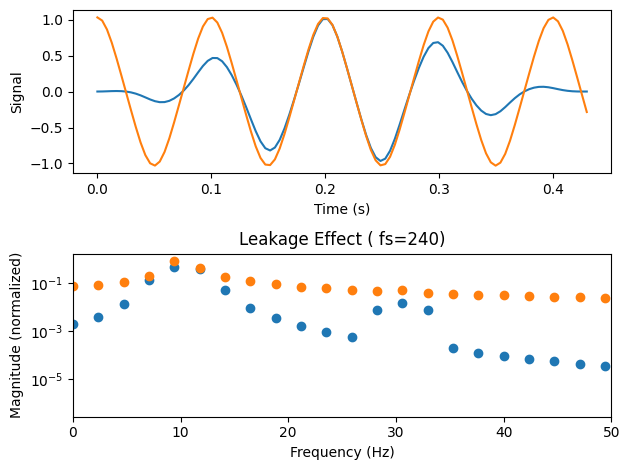

In [111]:
# Sample rate and time duration
fs = 120  # Hz
T = 0.43  # seconds
t = np.linspace(0, T, int(T * fs))

# Signal frequency (not an integer multiple of sampling rate)
f01 = 10  # Hz (not an integer multiple of fs)
f02 = 30
y = mysignal(t, f01,f02, 1,0.03)


recwindow = rectangular_window(len(y))
x =y*recwindow

hannwindow = signal.windows.hann(len(y))
y *= hannwindow


# Calculate FFT
fft_datay = np.fft.fft(y)
fft_absy = np.abs(fft_datay) / len(y)  # normalize magnitude

fft_datax = np.fft.fft(x)
fft_absx = np.abs(fft_datax) / len(x)  # normalize magnitude

# Calculate frequency axis
f = np.linspace(0, fs/2, int(len(fft_datay)/2) + 1)

# Plot original signal and FFT
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Signal')

plt.subplot(2, 1, 2)
plt.scatter(f, 2*fft_absy[:len(f)])
plt.scatter(f, 2*fft_absx[:len(f)])

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (normalized)')

# Show leakage around the expected frequency (f0) due to non-integer multiple of sampling rate
plt.title('Leakage Effect ( fs={})'.format( fs))
plt.xlim(0, 50)  # Limit frequency plot to half the sampling rate
plt.tight_layout()
plt.show()
